# Aspecto das avaliações de restaurantes do Twitter

### Bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np

### Bibiotecas de visualização

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Bibliotecas de aprendizado de máquina

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

### Carregamento dos dados

In [5]:
aspects_df = pd.read_csv('datasets/semeval2014.csv')
print(f'Linhas: {aspects_df.shape[0]} | Colunas: {aspects_df.shape[1]}')
aspects_df.head()

Linhas: 3044 | Colunas: 6


,text,service,food,anecdotes/miscellaneous,price,ambience
0,but the staff was so horrible to us,1,0,0,0,0
1,to be completely fair the only redeeming facto...,0,1,1,0,0
2,the food is uniformly exceptional with a very ...,0,1,0,0,0
3,where gabriela personaly greets you and recomm...,1,0,0,0,0
4,for those that go once and dont enjoy it all i...,0,0,1,0,0


### Dicionário dos dados

<ul>
    <li><b>text</b>: comentário</li>
    <li><b>service</b>: serviço</li>
    <li><b>food</b>: alimentação</li>
    <li><b>anecdotes/miscellaneous</b>: anedotas/diversos</li>
    <li><b>price</b>: preço</li>
    <li><b>ambience</b>: ambiente</li> 
</ul>

### Informações dos dados

In [6]:
aspects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     3044 non-null   object
 1   service                  3044 non-null   int64 
 2   food                     3044 non-null   int64 
 3   anecdotes/miscellaneous  3044 non-null   int64 
 4   price                    3044 non-null   int64 
 5   ambience                 3044 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 142.8+ KB


### Descrição dos dados

In [7]:
aspects_df.describe()

,service,food,anecdotes/miscellaneous,price,ambience
count,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000
mean,0.196124,0.405059,0.371551,0.104796,0.141919
std,0.397128,0.490984,0.483299,0.306341,0.349024
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Comentários por categoria

In [11]:
counts = []
categories = list(aspects_df.iloc[:, 1:].columns.values)

for i in categories:
    counts.append((i, aspects_df[i].sum()))

df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments']).sort_values(by='number_of_comments', ascending=False)
df_stats

,category,number_of_comments
1,food,1233
2,anecdotes/miscellaneous,1131
0,service,597
4,ambience,432
3,price,319


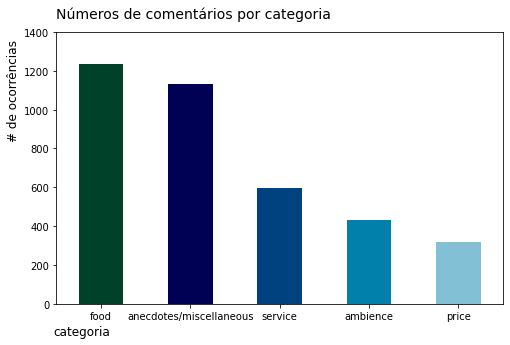

In [13]:
df_stats.plot(x='category', 
              y='number_of_comments', 
              kind='bar', 
              legend=False, 
              grid=False, 
              figsize=(8, 5), 
              rot=0, color=sns.color_palette('ocean', n_colors=5))

plt.title('Números de comentários por categoria', y=1.03, size=14, loc='left', x=-0.001)
plt.ylabel('# de ocorrências', fontsize=12, horizontalalignment='left', y=0.60)
plt.xlabel('categoria', fontsize=12, horizontalalignment='right', x=0.12)
plt.ylim(0, 1400)
plt.show()

### Quantidade de comentários por rótulo

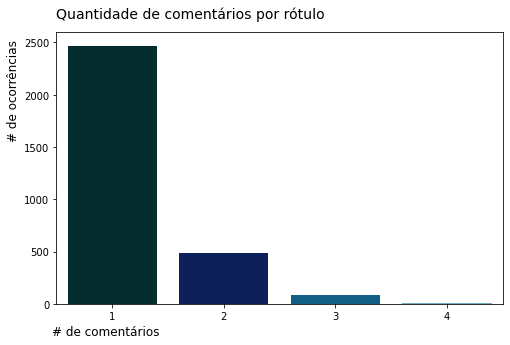

In [23]:
rowsums = aspects_df.iloc[:, 1:].sum(axis=1)
x=rowsums.value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x.index, x.values, palette=sns.color_palette('ocean', n_colors=4))
plt.title('Quantidade de comentários por rótulo', y=1.03, size=14, loc='left', x=-0.001)
plt.ylabel('# de ocorrências', fontsize=12, horizontalalignment='left', y=0.60)
plt.xlabel('# de comentários', fontsize=12, horizontalalignment='right', x=0.23)
plt.ylim(0, 2600)
plt.show()

### Distribuição do número de palavras dos textos

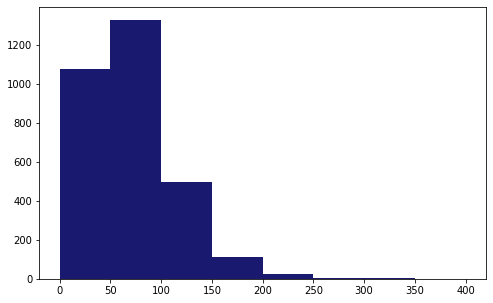

In [37]:
plt.figure(figsize=[8, 5])
aspects_df['text'].str.len().hist(bins=np.arange(0, 450, 50), grid=False, color=['#191970'])
plt.show()

### Valores faltantes

In [38]:
print('# de comentários faltantes: ', aspects_df['text'].isnull().sum())

# de comentários faltantes:  0


### Separação dos dados

In [43]:
X = aspects_df['text']
y = np.asarray(aspects_df[aspects_df.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Modelagem

In [48]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, max_df=0.85)),
    ('clf', MLkNN())
])


model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=3000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf', MLkNN(ignore_first_neighbours=0, k=10, s=1.0))],
         verbose=False)

In [50]:
predicted = model.predict(X_test)
print('Acurácia do teste: ', accuracy_score(y_test, predicted))
print('Hamming loss: ', hamming_loss(y_test, predicted))

Acurácia do teste:  0.5184079601990049
Hamming loss:  0.1470646766169154
